# Mecánica Analítica 

## Tarea 2: Péndulo Forzado Amortiguado

## Daniel Rodrigo Garduño Roa

1-. La solución particular para la ecuación lineal forzada y amortiguada del péndulo es:
 
 $$\theta_{p}(t) = \frac{A}{\sqrt{(\omega_{0}^2-\omega^2)^2 + \omega^{2}\mu^2}} \cos(\omega t - \delta)$$
 
 donde el término de amplitud sería:
 
 $$D = \frac{A}{\sqrt{(\omega_{0}^2-\omega^2)^2 + \omega^{2}\mu^2}}$$
  
  
  a)Tomando $A=1,\mu = 0.05, \omega_{0}=1$

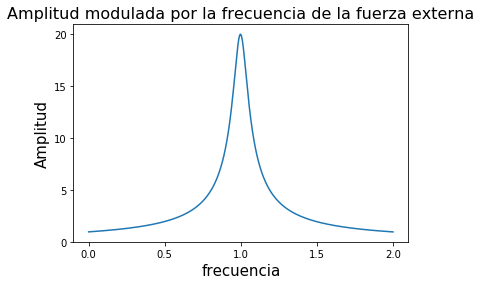

In [101]:
%matplotlib inline                      
%config InlineBackend.fiugre_format = 'svg' #esto vectoriza las imágenes para un mejor manejo, es sólo un plus
import numpy as np #Este será nuestro método principal para manejar las funciones y graficarlas, es un método muy general con estos módulos
import matplotlib.pyplot as plt 
    
w = np.linspace(0,2,1000) #usamos este número de iteraciones para suavizar las curvas y no queden "chatas"
plt.plot(w, 1/np.sqrt((1-w)**2+w**2*0.05**2))
plt.rcParams['figure.figsize'] = (20,20) #se ajusta el tamaño de la imágen
plt.rcParams.update({'font.size': 15})
plt.title("Amplitud modulada por la frecuencia de la fuerza externa", fontsize = 16)
plt.ylabel("Amplitud",fontsize = 15)
plt.xlabel("frecuencia", fontsize = 15)
plt.show()

Existe una resonancia que es fácil de ver en la gráfica sobre el punto $\omega = 1$

b) La fase de la solución partícular está dada por :

$$ \delta = \arctan\left(\frac{\omega \mu}{\omega_0^2 - \omega^2}\right) $$

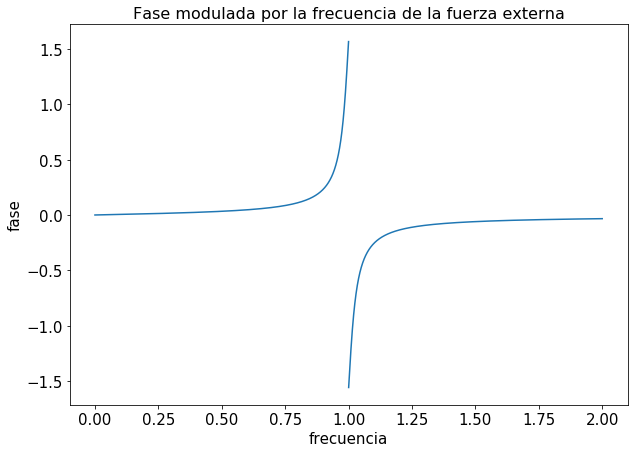

In [107]:
import matplotlib.pyplot as plt 
import numpy as np
mu = 0.05
w = np.linspace(0,2,10000) #se obtenía un warning por la división entre 0 pero este comando lo arregla quitando esa zona de la función
w[5000] = np.nan


def g(w):                            #en adelante así crearemos funciones por ser un método fácil y para poderlas llamar más adelante
    return np.arctan(mu*w/(1-w**2))
plt.plot(w,g(w))
plt.rcParams['figure.figsize'] = (10,7) 
plt.rcParams.update({'font.size': 15})
plt.title("Fase modulada por la frecuencia de la fuerza externa", fontsize = 16)
plt.ylabel("fase",fontsize = 15)
plt.xlabel("frecuencia", fontsize = 15)
plt.show()

c)Graficaremos primero la solución particular para el ángulo con dos valores de $\omega$ Pero primero tenemos que añadir la solución complementaria a nuestra solución particular y así obtener la solución general entonces:

$$ \theta_{c}(t)= e^{\frac{-\mu t}{2}} \left[ A_{1}exp\left(\sqrt{\frac{\mu^2}{4}-\omega_{0}^2t}\right)+A_{2}exp\left(\sqrt{\frac{\mu^2}{4}-\omega_{0}^2t}\right)\right] $$


pero como $\omega_{0}^2 > \beta^2 = \mu^2/4 $ nuestra solución correspondiente que ahora es la homogenea en el caso infra-amortiguado es:

$$ Ae^{-\frac{\mu t}{2}} \left(cos(\sqrt{\omega_{0}^2-\frac{\mu^2 t}{4}} -\delta_{h} \right) $$

y por lo tanto la solución general sería:

$$\theta(t) = \theta_{c} + \theta_{p} = Ae^{-\frac{\mu t}{2}} \left(cos(\sqrt{\omega_{0}^2-\frac{\mu^2t}{4}} -\delta_{h} \right) + \frac{A}{\sqrt{(\omega_{0}^2-\omega^2)^2 + \omega^{2}\frac{\mu^2t}{4}}} \cos(\omega t - \delta) $$

Y hacemos $\delta_{h} = 0 $

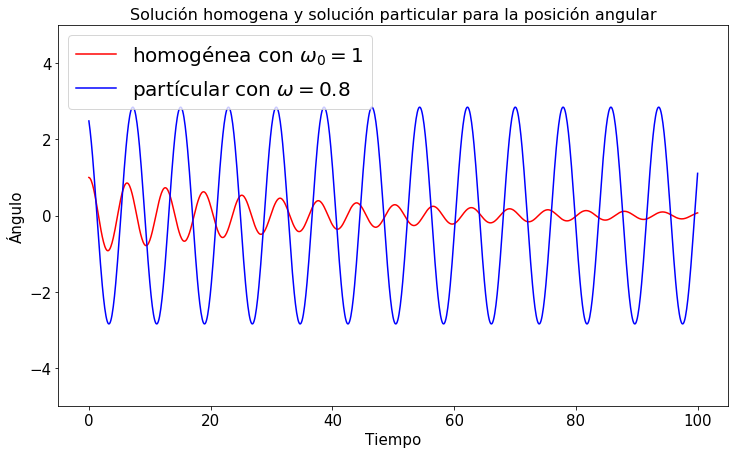

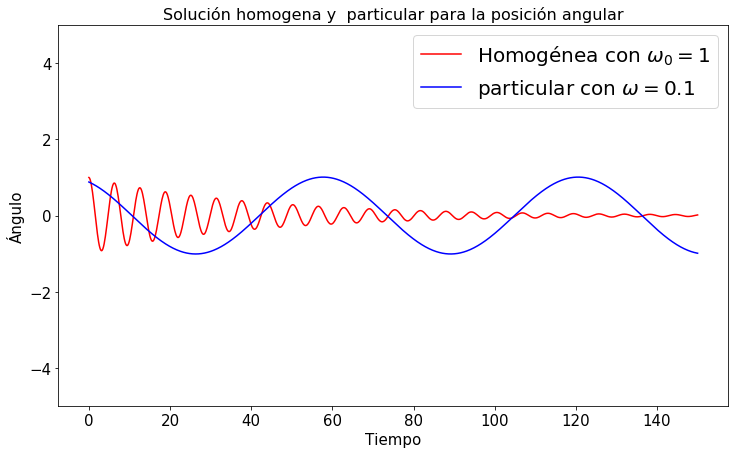

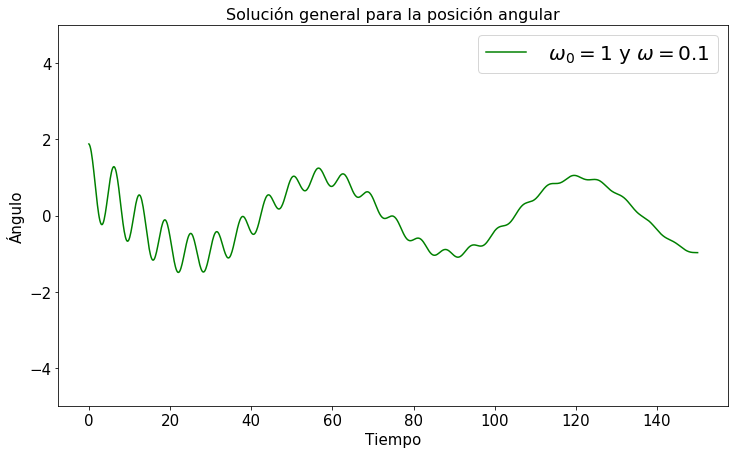

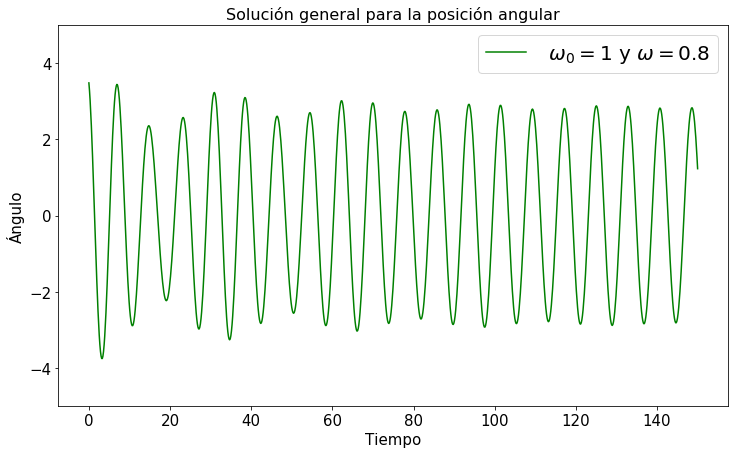

In [86]:
def f(t):
    return A*np.cos(w*t-d)/np.sqrt((w0**2-w**2)**2-4*mu**2*w**2)
def fhom(t):
    return A*np.exp((-mu/2)*t)*(np.cos(np.sqrt(w0**2 - (mu/2)**2)*t))
def fgen(t):
    return A*np.exp((-mu/2)*t)*(np.cos(np.sqrt(w0**2 - (mu/2)**2)*t)) + A*np.cos(w*t-d)/np.sqrt((w0**2-w**2)**2-4*mu**2*w**2) 
A = 1
w0 = 1
mu = 0.05
w=0.8    #Solución particular y homogénea con el primer parámetro
d=np.arctan(2*w*mu/w0**2-w**2)
t = np.linspace(0,100,1000)
plt.rcParams['figure.figsize'] = (12,7)
plt.rcParams.update({'font.size': 15})
plt.title("Solución homogena y solución particular para la posición angular", fontsize = 16)
plt.ylabel("Ángulo",fontsize = 15)
plt.xlabel("Tiempo", fontsize = 15)
plt.ylim(-5, 5)
plt.plot(t,fhom(t), color = "red", label = "homogénea con $\omega_0=1$")
plt.plot(t, f(t), color = "blue", label = "partícular con $\omega=0.8$")
plt.legend(loc = 'best', fontsize = 20)
plt.show()

w=0.1 #Solución particular y homogénea con el segundo parámetro
t = np.linspace(0,150,1000)
plt.rcParams['figure.figsize'] = (12,7)
plt.rcParams.update({'font.size': 15})
plt.title("Solución homogena y  particular para la posición angular", fontsize = 16)
plt.ylabel("Ángulo",fontsize = 15)
plt.xlabel("Tiempo", fontsize = 15)
plt.ylim(-5, 5)
plt.plot(t,fhom(t), color = "red", label = "Homogénea con $\omega_0=1$")
plt.plot(t, f(t), color = "blue", label = "particular con $\omega=0.1$")
plt.legend(loc = 'best', fontsize = 20)
plt.show()

#solución general
plt.rcParams['figure.figsize'] = (12,7)
plt.rcParams.update({'font.size': 15})
plt.title("Solución general para la posición angular", fontsize = 16)
plt.ylabel("Ángulo",fontsize = 15)
plt.xlabel("Tiempo", fontsize = 15)
plt.ylim(-5, 5)
plt.plot(t,fgen(t), color = "green", label = " $\omega_0=1$ y $\omega=0.1$")
plt.legend(loc = 'best', fontsize = 20)
plt.show()

w=0.8
plt.rcParams['figure.figsize'] = (12,7)
plt.rcParams.update({'font.size': 15})
plt.title("Solución general para la posición angular", fontsize = 16)
plt.ylabel("Ángulo",fontsize = 15)
plt.xlabel("Tiempo", fontsize = 15)
plt.ylim(-5, 5)
plt.plot(t,fgen(t), color = "green", label = " $\omega_0=1$ y $\omega=0.8$")
plt.legend(loc = 'best', fontsize = 20)
plt.show()



Ahora graficaremos la función velocidad que queda de la siguiente manera al derivar la solución general:
$$\dot\theta(t) = \frac{A\mu}{4}e^{\frac{-\mu t}{2}}\left(\frac{\mu sen(\sqrt{\omega_{0}^2-\frac{\mu^2}{4}}}{\sqrt{4\omega_{0}^2-\mu^2}}-2cos\left(\sqrt{\omega_{0}^2-\frac{\mu^2}{4}}\right)\right) +   \frac{-A\omega}{\sqrt{(\omega_{0}^2-\omega^2)^2 + 4\omega^{2}\mu^2}} \sin(\omega t - \delta)$$

Usamos los dos valores $\omega$ escogidos anteriormente como condiciones iniciales:
 

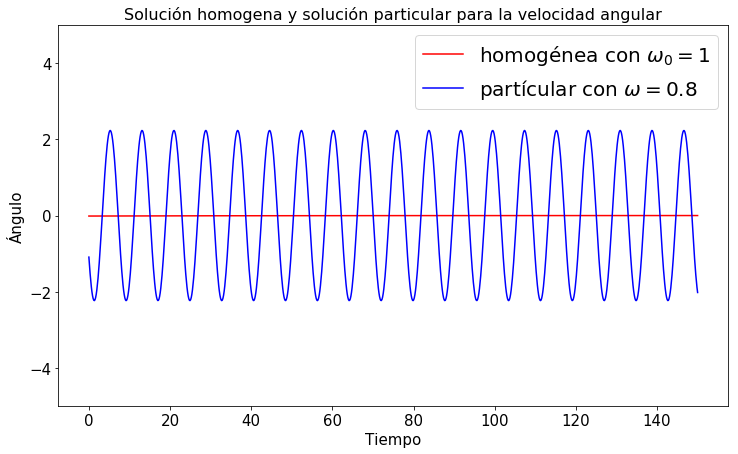

In [94]:
import matplotlib.pyplot as plt
import sympy as sp #con este módulo podemos usar sp.diff para derivar pero no pude acoplar el resultado a la hora de plotear
import numpy as np
def vp(t):
    return -A*w*np.sin(w*t-d)/np.sqrt((w0**2-w**2)**2-mu**2*w**2)
def vhom(t):
    return A*(mu/4)*np.exp(-mu*t/2)*(mu*np.sin(np.sqrt(w0**2-(t*mu**2/4)))/(np.sqrt(4*w0-(t*mu**2))) -2*np.cos(np.sqrt(w0-(t*mu**2/4))))
A = 1
w0 = 1
mu = 0.05
w=0.8
d=np.arctan(2*w*mu/w0**2-w**2)
t = np.linspace(0,10,1000)
plt.rcParams['figure.figsize'] = (12,7)
plt.rcParams.update({'font.size': 15})
plt.title("Solución homogena y solución particular para la velocidad angular", fontsize = 16)
plt.ylabel("Ángulo",fontsize = 15)
plt.xlabel("Tiempo", fontsize = 15)
plt.ylim(-5, 5)
plt.plot(t,vhom(t), color = "red", label = "homogénea con $\omega_0=1$")
plt.plot(t, vp(t), color = "blue", label = "partícular con $\omega=0.8$")
plt.legend(loc = 'best', fontsize = 20)
plt.show()

#Creo que mi derivada está bien pero sin duda el resultado en la gráfica está mal para la solución homogénea, no pude encontrar el error


d) usando los valores iniciales anteriores obtendremos los diagramas espacio fase $ (\theta(t),\dot \theta (t))$ para las soluciones particulares

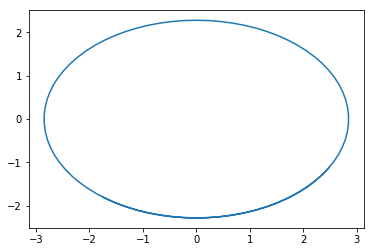

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return A*np.cos(w*t-d)/np.sqrt((w0**2-w**2)**2-4*mu**2*w**2)

def g(t):
    return -A*w*np.sin(w*t-d)/np.sqrt((w0**2-w**2)**2-4*mu**2*w**2)

#Esto lo debí hacer con la solución general pero no comencé la tarea en un tiempo saludable y ya no alcancé a corregir esta parte

A = 1
w0 = 1
mu = 0.05
w=0.8
d=np.arctan(2*w*mu/w0**2-w**2)
t = np.linspace(0,10,1000)

plt.plot(f(t),g(t))
plt.show()


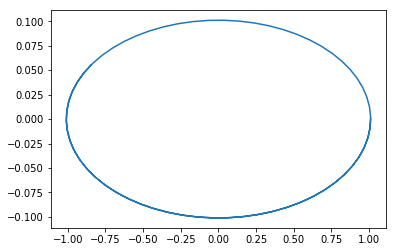

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return A*np.cos(w*t-d)/np.sqrt((w0**2-w**2)**2-4*mu**2*w**2)

def g(t):
    return -A*w*np.sin(w*t-d)/np.sqrt((w0**2-w**2)**2-4*mu**2*w**2)

#Se debió usar solución general

A = 1
w0 = 1
mu = 0.05
w=0.1
d=np.arctan(2*w*mu/w0**2-w**2)
t = np.linspace(0,100,1000)

plt.plot(f(t),g(t))
plt.show()